In [11]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForSeq2SeqLM

In [12]:
dir = '../../../../_data/fig-symmetry-language-models/full-models/T5Decoder-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [13]:
path = ["decoder.block[", "].layer[0].SelfAttention.q.weight", "].layer[0].SelfAttention.k.weight"]

'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-small'] = [l, d, h, dh, score_List]

'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-small")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-small-v1.1'] = [l, d, h, dh, score_List]

'T5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-base'] = [l, d, h, dh, score_List]

'T5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-base")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-base-v1.1'] = [l, d, h, dh, score_List]

'T5 large model (l = 24, d = 1024, h = 16 ; tot num parameters 738M)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-large")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-large'] = [l, d, h, dh, score_List]

'T5 large model (l = 24, d = 1024, h = 16 ; tot num parameters 738M)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-large")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-large-v1.1'] = [l, d, h, dh, score_List]

'T5 3b model (l = 24, d = 4096, h = 32 ; tot num parameters 2.85B)'
## Wq and Wk have dim [4096, 1024], must use some sort of group attention
dh = 64
l = 24
d = 4096
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-3b")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-3b'] = [l, d, h, dh, score_List]

'T5 3b model (l = 24, d = 4096, h = 32 ; tot num parameters 2.85B)'
## Wq and Wk have dim [4096, 1024], must use some sort of group attention
dh = 64
l = 24
d = 4096
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-xl")
score_List= get_scores_full(d, l, h, dh, model, path)
models['T5-xl-v1.1'] = [l, d, h, dh, score_List]

In [14]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

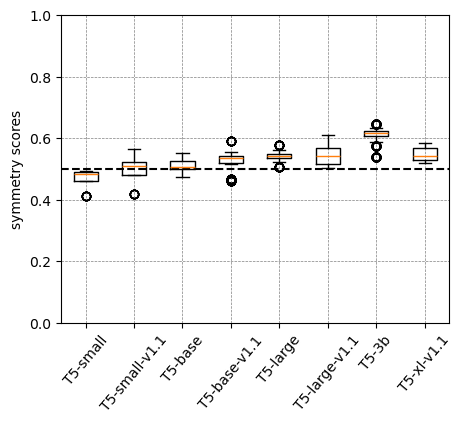

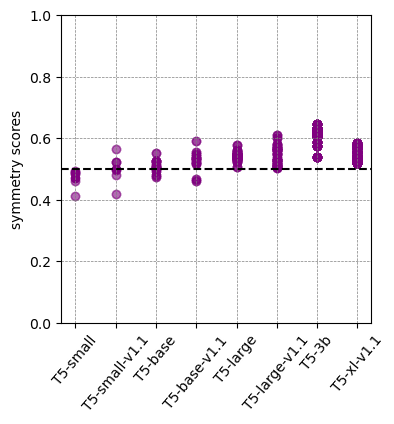

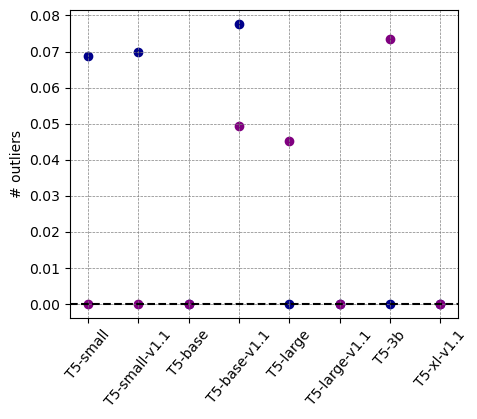

In [15]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)